In [1]:
#import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
# Some EDA
# Read the data
df = pd.read_csv("./data/rawdata.csv")
df.head()

,DiaChi,TinhTrangBDS,DienTich,Gia/m2,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Đã bàn giao,62 m²,"32,26 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2 tỷ- 62 m2đ
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Đã bàn giao,95 m²,"55,79 triệu/m²",3 phòng,NaN,NaN,2 phòng,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,"5,3 tỷ- 95 m2đ"
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Chưa bàn giao,75 m²,"34,4 triệu/m²",2 phòng,2,5.0,2 phòng,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,"2,58 tỷ- 75 m2đ"
3,"108, Đường Hồng Hà, Phường 2, Quận Tân Bình, T...",Đã bàn giao,70 m²,"57,14 triệu/m²",1 phòng,A,7.0,1 phòng,Chung cư,Đang chờ sổ,BPA - 0712,Nội thất cao cấp,Đông Nam,Tây Bắc,NaN,4 tỷ- 70 m2đ
4,"Đường Hậu Giang, Phường 11, Quận 6, Tp Hồ Chí ...",Đã bàn giao,83 m²,"35,54 triệu/m²",2 phòng,NaN,NaN,2 phòng,Chung cư,Đã có sổ,NaN,Nội thất cao cấp,Tây Bắc,NaN,NaN,"2,95 tỷ- 83 m2đ"


In [3]:
# Check the shape of the data
df.shape


(24942, 16)

In [4]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24942 entries, 0 to 24941
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24942 non-null  object 
 1   TinhTrangBDS      24921 non-null  object 
 2   DienTich          24914 non-null  object 
 3   Gia/m2            24913 non-null  object 
 4   Phongngu          24923 non-null  object 
 5   TenPhanKhu        7036 non-null   object 
 6   SoTang            6726 non-null   float64
 7   PhongTam          24388 non-null  object 
 8   Loai              24923 non-null  object 
 9   GiayTo            18852 non-null  object 
 10  MaCanHo           3358 non-null   object 
 11  TinhTrangNoiThat  12788 non-null  object 
 12  HuongCuaChinh     9370 non-null   object 
 13  HuongBanCong      8670 non-null   object 
 14  DacDiem           5600 non-null   object 
 15  Gia               24942 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [5]:

# Check the missing value
df.isnull().sum()

DiaChi                  0
TinhTrangBDS           21
DienTich               28
Gia/m2                 29
Phongngu               19
TenPhanKhu          17906
SoTang              18216
PhongTam              554
Loai                   19
GiayTo               6090
MaCanHo             21584
TinhTrangNoiThat    12154
HuongCuaChinh       15572
HuongBanCong        16272
DacDiem             19342
Gia                     0
dtype: int64

In [6]:
# Check the unique value
df.nunique()

DiaChi              3447
TinhTrangBDS           2
DienTich            1045
Gia/m2              5046
Phongngu              10
TenPhanKhu           923
SoTang                54
PhongTam               7
Loai                   6
GiayTo                 3
MaCanHo             1230
TinhTrangNoiThat       4
HuongCuaChinh          8
HuongBanCong           8
DacDiem                1
Gia                 9945
dtype: int64

In [7]:
# Check the distribution of the data
df.describe()

,SoTang
count,6726.000000
mean,11.482307
std,18.142728
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,789.000000


## 1.1. Tiền xử lý dữ liệu

In [8]:
df["DienTich"] = df["DienTich"].str.replace(" m²", "").str.replace(" m2", "")

In [9]:
so_phong_ngu = {
    " 2 phòng":2,
    " 3 phòng":3,
    " 1 phòng":1,
    " 4 phòng":4,
    np.nan: 0,
    " 5 phòng":5,
    " 6 phòng":6,
    " nhiều hơn 10 phòng":11,
    " 7 phòng":7,
    " 10 phòng":10,
    " 8 phòng":8,
}

df["Phongngu"] = df["Phongngu"].replace(so_phong_ngu)

Đoạn mã Python này đang chuyển đổi dữ liệu trong cột 'Phongngu' của dataframe `df` từ dạng chuỗi sang dạng số. 

Đầu tiên, một từ điển `so_phong_ngu` được tạo ra để ánh xạ các giá trị chuỗi sang giá trị số tương ứng. 

Sau đó, hàm `replace()` được sử dụng để thay thế các giá trị chuỗi trong cột 'Phongngu' bằng các giá trị số tương ứng từ từ điển `so_phong_ngu`.

In [11]:
so_phong_tam = {
    " 2 phòng":2,
    " 1 phòng":1,
    " 3 phòng":3,
    np.nan: 0,
    " 4 phòng":4,
    " 5 phòng":5,
    " 6 phòng":6,
    " Nhiều hơn 6 phòng":7,
}
df["PhongTam"] = df["PhongTam"].replace(so_phong_tam)

Đoạn mã Python này đang chuyển đổi dữ liệu trong cột 'PhongTam' của dataframe `df` từ dạng chuỗi sang dạng số.

Đầu tiên, một từ điển `so_phong_tam` được tạo ra để ánh xạ các giá trị chuỗi sang giá trị số tương ứng.

Sau đó, hàm `replace()` được sử dụng để thay thế các giá trị chuỗi trong cột 'PhongTam' bằng các giá trị số tương ứng từ từ điển `so_phong_tam`.

In [13]:
df["Gia/m2"] = df["Gia/m2"].str.replace("triệu/m²", "").str.replace(",", ".").str.replace(" đ/m²","").str.replace(" triệu", "").str.replace(" tỷ/m²","").str.replace(" đ", "").str.replace("/m2","").astype(float)

In [14]:
for i in range(len(df.Gia)):
    gia = df.Gia[i]
    gia = gia.replace(',', '.')  
    
    match = re.search(r"([\d.]+)\s*(triệu|tỷ)", gia)
    if match:
        price = float(match.group(1))
        unit = match.group(2)
        
        if unit == 'triệu':
            price *= 1000000
        elif unit == 'tỷ':
            price *= 1000000000
        
        df.Gia[i] = round(price, 1)
    else:
        df.Gia[i] = None 

Đoạn mã Python này thực hiện việc làm sạch và chuyển đổi dữ liệu trên cột 'Gia/m2' và 'Gia' của dataframe `df`.

Đầu tiên, cột 'Gia/m2' được làm sạch bằng cách thay thế các chuỗi không cần thiết bằng chuỗi rỗng hoặc dấu chấm (để xử lý số thập phân), sau đó chuyển đổi chuỗi đã làm sạch thành số float.

Phần còn lại của mã là một vòng lặp xử lý từng hàng trong cột 'Gia'. Đối với mỗi hàng, mã thực hiện các bước sau:

1. Thay thế dấu phẩy bằng dấu chấm trong giá trị 'Gia' để xử lý số thập phân.
2. Sử dụng biểu thức chính quy để tìm một số theo sau là 'triệu' hoặc 'tỷ'. Nếu tìm thấy, số được chuyển đổi thành float và đơn vị ('triệu' hoặc 'tỷ') cũng được trích xuất.
3. Tùy thuộc vào đơn vị, giá cả được nhân với 1,000,000 (đối với 'triệu') hoặc 1,000,000,000 (đối với 'tỷ') để chuyển giá cả về cùng một tỷ lệ.
4. Giá cả sau đó được làm tròn đến 1 chữ số thập phân và lưu trở lại vào cột 'Gia' của dataframe.
5. Nếu không tìm thấy mẫu phù hợp trong giá trị 'Gia', nó sẽ được đặt thành None.

In [15]:
df.Gia = df.Gia.astype(float)
df.DienTich = df.DienTich.astype(float)

In [16]:
df['Quan'] = df.DiaChi.copy()
for i in range(0,len(df.DiaChi)):
    a= df.DiaChi[i].split(',')
    df['Quan'][i] = a[len(a)-2]
for i in df['Quan']:
    if 'Quận' not in i and 'Huyện' not in i:
        df = df.drop(df[df['Quan']==i].index)

Đoạn mã Python này thực hiện việc trích xuất và làm sạch dữ liệu trên cột 'DiaChi' và 'Quan' của dataframe `df`.

Đầu tiên, cột 'DiaChi' được sao chép sang cột mới 'Quan'.

Sau đó, một vòng lặp được sử dụng để duyệt qua từng hàng trong cột 'DiaChi'. Đối với mỗi hàng, giá trị 'DiaChi' được chia thành một danh sách các chuỗi bằng dấu phẩy. Chuỗi thứ hai từ cuối trong danh sách (được giả định là quận hoặc 'Quan') sau đó được lưu vào cột 'Quan' của dataframe.

Cuối cùng, một vòng lặp khác được sử dụng để duyệt qua từng hàng trong cột 'Quan'. Nếu giá trị 'Quan' không chứa chuỗi 'Quận' hoặc 'Huyện', hàng tương ứng sẽ bị xóa khỏi dataframe.

Kết quả của đoạn mã này là cột 'Quan' trong dataframe `df` giờ đây chứa thông tin quận được trích xuất từ cột 'DiaChi', và các hàng có thông tin quận không hợp lệ đã bị xóa.

In [17]:
df.Quan.unique()

array([' Quận 7', ' Quận Bình Tân', ' Quận Tân Bình', ' Quận 6',
       ' Quận 8', ' Quận Bình Thạnh', ' Huyện Bình Chánh',
       ' Huyện Hóc Môn', ' Quận Thủ Đức', ' Quận 9', ' Quận 10',
       ' Huyện Nhà Bè', ' Quận 12', ' Quận Tân Phú', ' Quận 2',
       ' Quận Phú Nhuận', ' Quận 1', ' Quận 4', ' Quận 11', ' Quận 5',
       ' Quận Gò Vấp', ' Quận 3', ' Huyện Củ Chi'], dtype=object)

In [18]:
# xóa Gia/m2
df = df.drop('Gia/m2', axis=1)
# xoa DiaChi
df = df.drop('DiaChi', axis=1)

In [19]:
# xóa 3 hàng có giá trị lớn nhất của "Gia"
df = df.drop(df[df['Gia'] > 20000000000].index)
df = df.drop(df[df['Gia'] < 250000000].index)

In [20]:
# remove các dòng TinhTrangBDS ,DienTich,  Gia/m2 , gia có giá trị null
df = df.drop(df[df['TinhTrangBDS'].isnull()].index)
df = df.drop(df[df['DienTich'].isnull()].index)
df = df.drop(df[df['Gia'].isnull()].index)                 

In [21]:

rows  = df[df.DienTich > 500]
df = df.drop(index = rows.index)
rows  = df[df.SoTang > 81]
df = df.drop(index = rows.index)

print("The number of row after cleaning data:",len(df))

The number of row after cleaning data: 23816


In [22]:
# Tao cột USD bằng Gia/25000
df['USD'] = df['Gia']/25000
# Sau đó xóa cột Gia
df = df.drop('Gia', axis=1)

In [23]:
# TinhTrangBDS xóa khoảng trắng đầu và cuối
df['TinhTrangBDS'] = df['TinhTrangBDS'].str.strip()

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,USD
count,23816.00,23816.00,6391.00,23816.00,23816.00
mean,71.18,2.04,10.94,1.71,110505.17
std,28.50,0.71,7.32,0.63,78110.22
min,1.00,1.00,1.00,0.00,10000.00
25%,56.00,2.00,5.00,1.00,67320.00
50%,68.00,2.00,9.00,2.00,92000.00
75%,79.00,2.00,16.00,2.00,135999.97
max,500.00,11.00,46.00,7.00,800000.00


In [25]:
df.to_csv('./data/dataset.csv',encoding="utf-8-sig",index=False)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23816 entries, 0 to 24941
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TinhTrangBDS      23816 non-null  object 
 1   DienTich          23816 non-null  float64
 2   Phongngu          23816 non-null  int64  
 3   TenPhanKhu        6729 non-null   object 
 4   SoTang            6391 non-null   float64
 5   PhongTam          23816 non-null  int64  
 6   Loai              23816 non-null  object 
 7   GiayTo            18001 non-null  object 
 8   MaCanHo           3225 non-null   object 
 9   TinhTrangNoiThat  12199 non-null  object 
 10  HuongCuaChinh     8984 non-null   object 
 11  HuongBanCong      8331 non-null   object 
 12  DacDiem           5328 non-null   object 
 13  Quan              23816 non-null  object 
 14  USD               23816 non-null  float64
dtypes: float64(3), int64(2), object(10)
memory usage: 2.9+ MB


## 2. Trực quan hóa dữ liệu

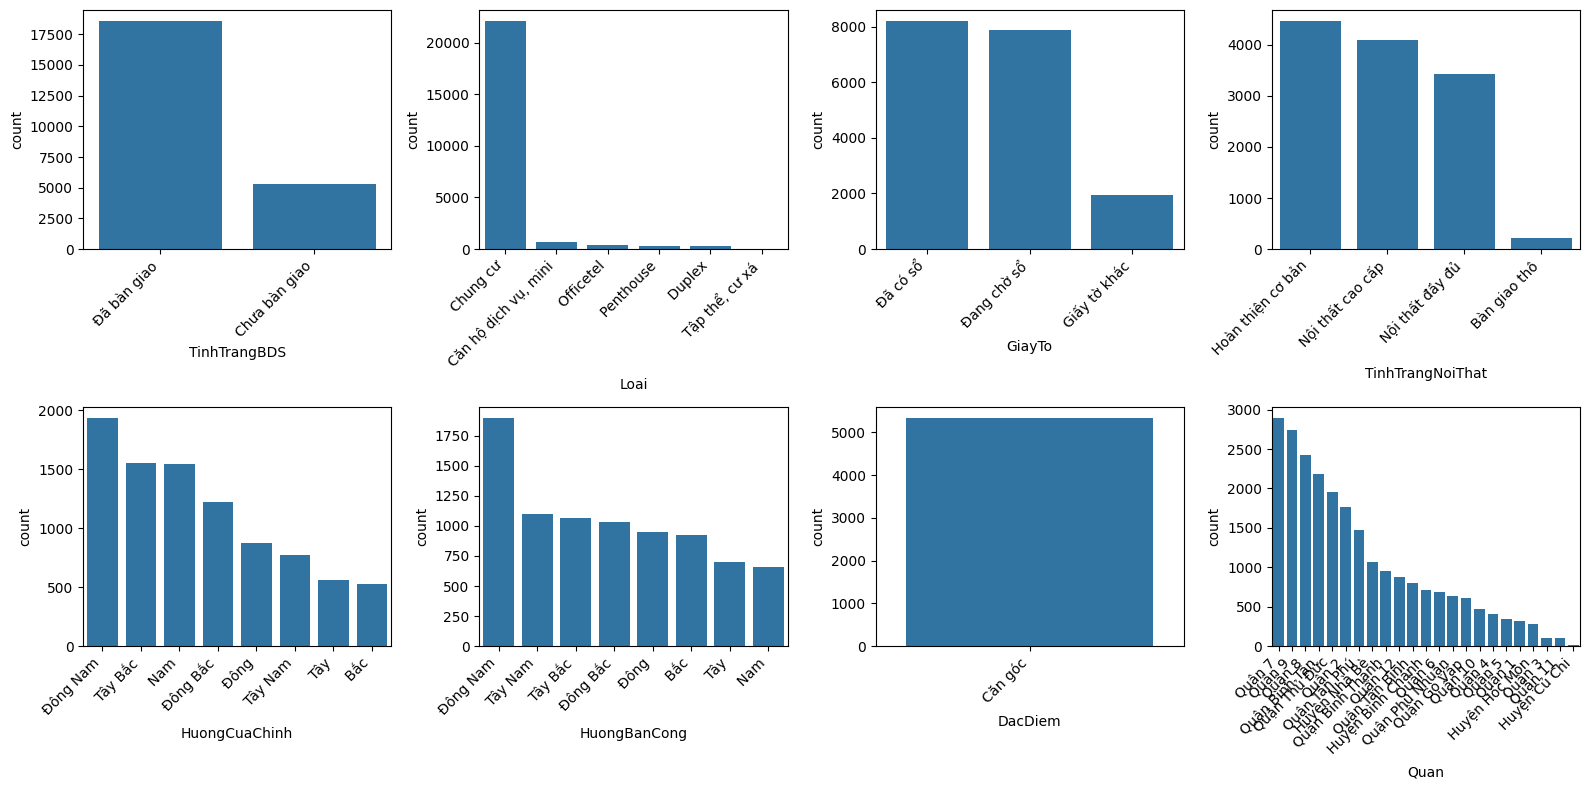

In [27]:
# Trực quan hóa biến số phân loại (categorical variables)
# các biểu đồ liên tiếp nhau, giảm dần theo số lượng

categorical_vars = ['TinhTrangBDS', 'Loai', 'GiayTo', 'TinhTrangNoiThat', 'HuongCuaChinh', 'HuongBanCong', 'DacDiem', 'Quan']

# Thiết lập kích thước subplot và biểu đồ
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, catplot in zip(axes, categorical_vars):
    sns.countplot(x=catplot, data=df, ax=ax, order=df[catplot].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

plt.show()

Đoạn mã Python này tạo ra các biểu đồ đếm cho các biến phân loại trong dataframe `df`.

1. Danh sách `categorical_vars` chứa tên các cột phân loại.
2. `plt.subplots(2, 4, figsize=(16, 8))` tạo ra một hình với 8 subplot (2 hàng, 4 cột).
3. Vòng lặp `for` tạo biểu đồ đếm cho mỗi biến phân loại trên mỗi subplot.
4. `sns.countplot()` tạo biểu đồ đếm, `ax.set_xticklabels()` xoay nhãn trục x 45 độ để dễ đọc.
5. `plt.tight_layout()` điều chỉnh khoảng cách giữa các subplot.
6. `plt.show()` hiển thị hình với tất cả các subplot.

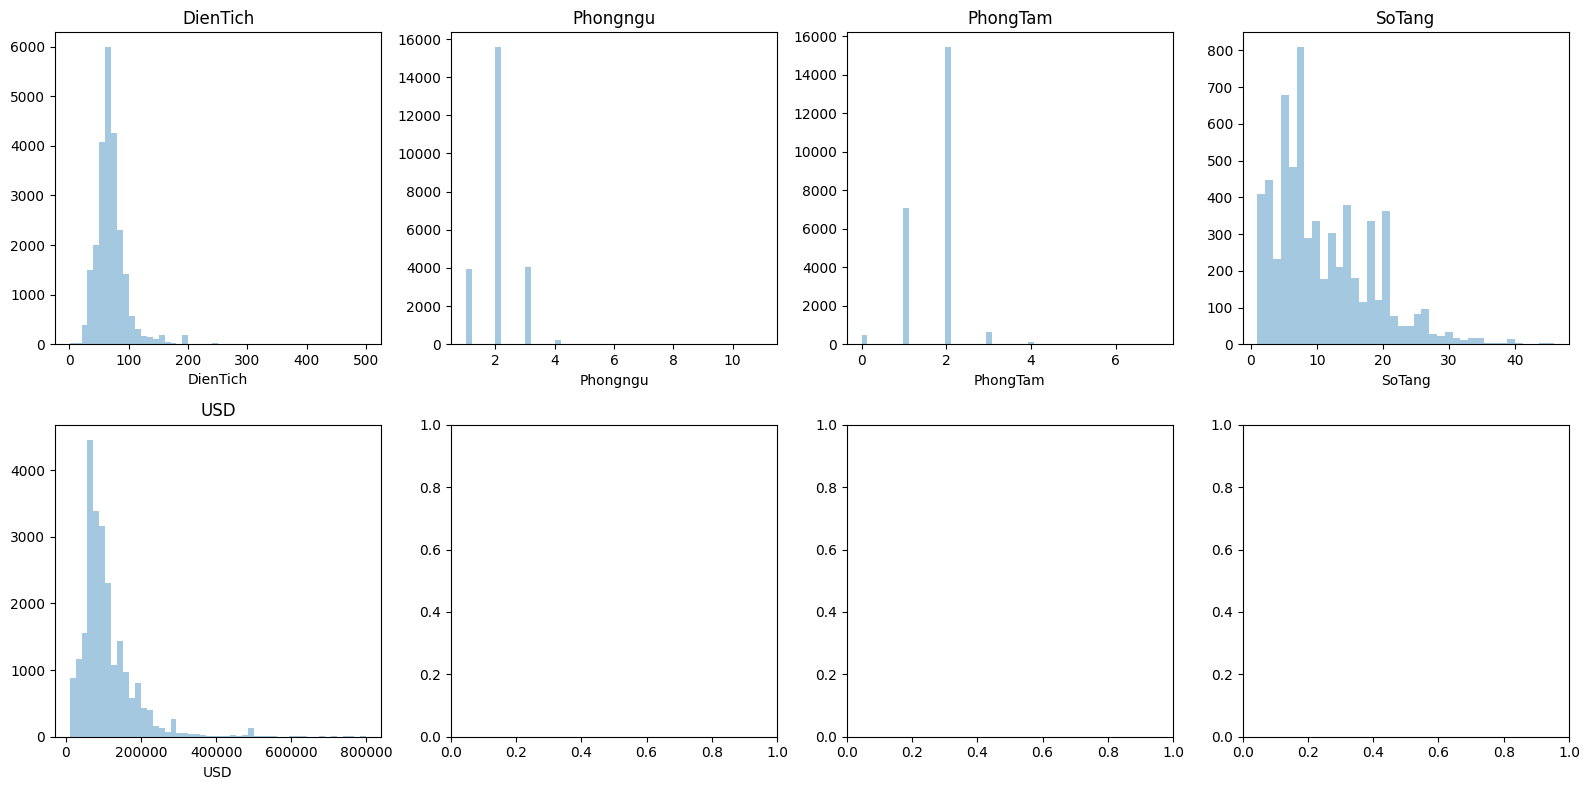

In [28]:

# Trực quan hóa biến số liên tục (continuous variables)
# các biểu đồ liên tiếp nhau, giảm dần theo số lượng

continuous_vars = ['DienTich', 'Phongngu', 'PhongTam', 'SoTang', 'USD']

# Thiết lập kích thước subplot và biểu đồ
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, cont_var in zip(axes, continuous_vars):
    sns.distplot(df[cont_var], ax=ax, kde=False)
    ax.set_title(cont_var)

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

plt.show()


Đoạn mã Python này tạo ra các biểu đồ phân phối cho các biến liên tục trong dataframe `df`.

1. Danh sách `continuous_vars` chứa tên các cột liên tục.
2. `plt.subplots(2, 4, figsize=(16, 8))` tạo ra một hình với 8 subplot (2 hàng, 4 cột).
3. Vòng lặp `for` tạo biểu đồ phân phối cho mỗi biến liên tục trên mỗi subplot. `sns.distplot()` được sử dụng để tạo biểu đồ phân phối, với `kde=False` để chỉ hiển thị histogram và không vẽ đường mật độ hạt nhân.
4. `ax.set_title(cont_var)` đặt tiêu đề cho mỗi subplot dựa trên tên của biến liên tục.
5. `plt.tight_layout()` điều chỉnh khoảng cách giữa các subplot.
6. `plt.show()` hiển thị hình với tất cả các subplot.

Lớp `zip` được sử dụng để tạo ra một iterator từ hai hoặc nhiều iterable, cho phép bạn lặp qua các iterable này đồng thời. Trong trường hợp này, nó được sử dụng để lặp qua `axes` và `continuous_vars` cùng một lúc.

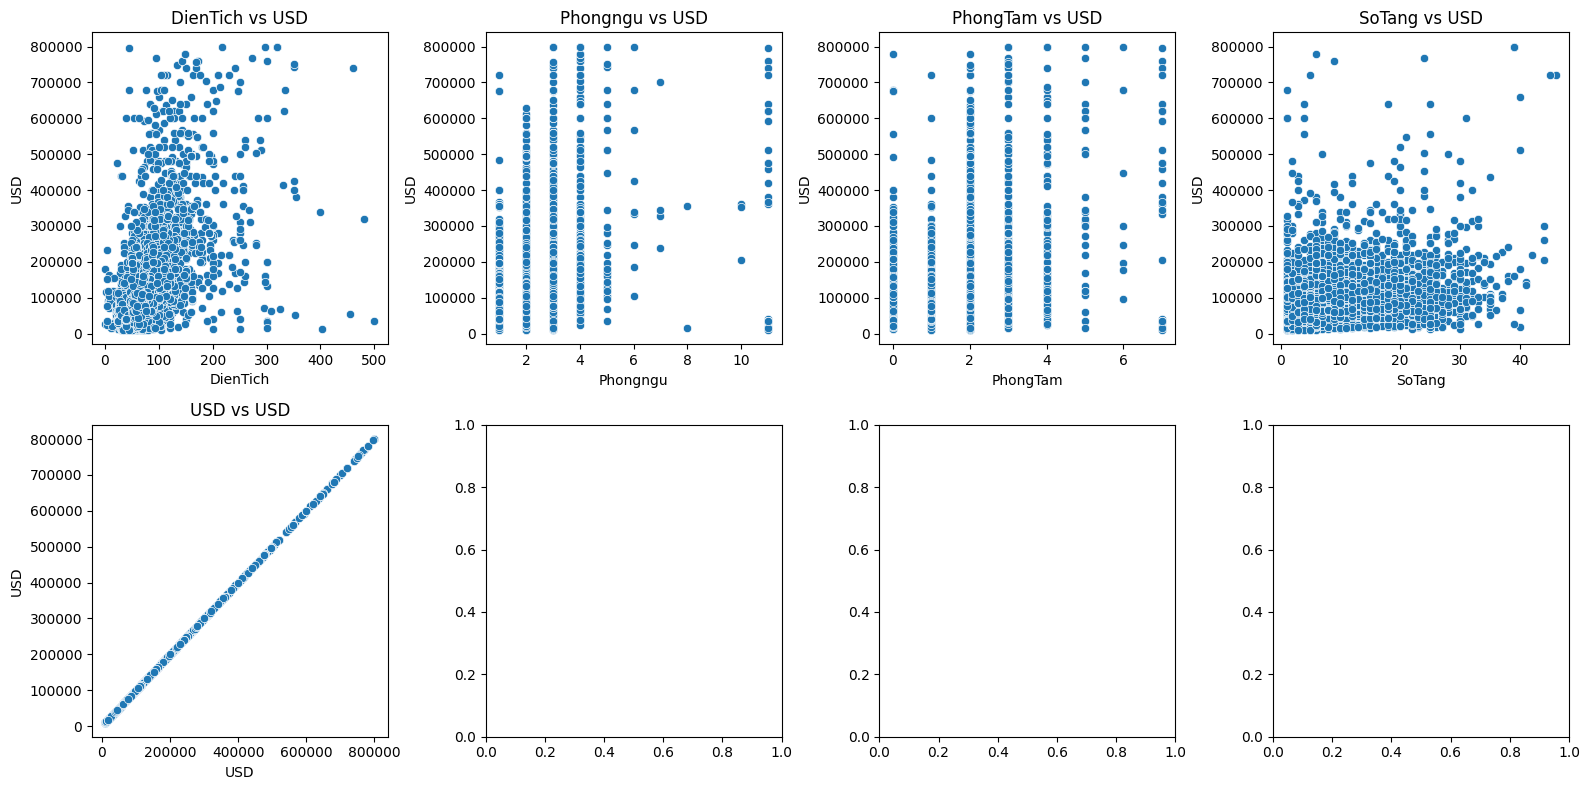

In [29]:
# trực quan hóa các biến với "USD"
# các biểu đồ liên tiếp nhau
# Thiết lập kích thước subplot và biểu đồ
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for ax, cont_var in zip(axes, continuous_vars):
    sns.scatterplot(x=cont_var, y='USD', data=df, ax=ax)
    ax.set_title(f'{cont_var} vs USD')
# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

plt.show()

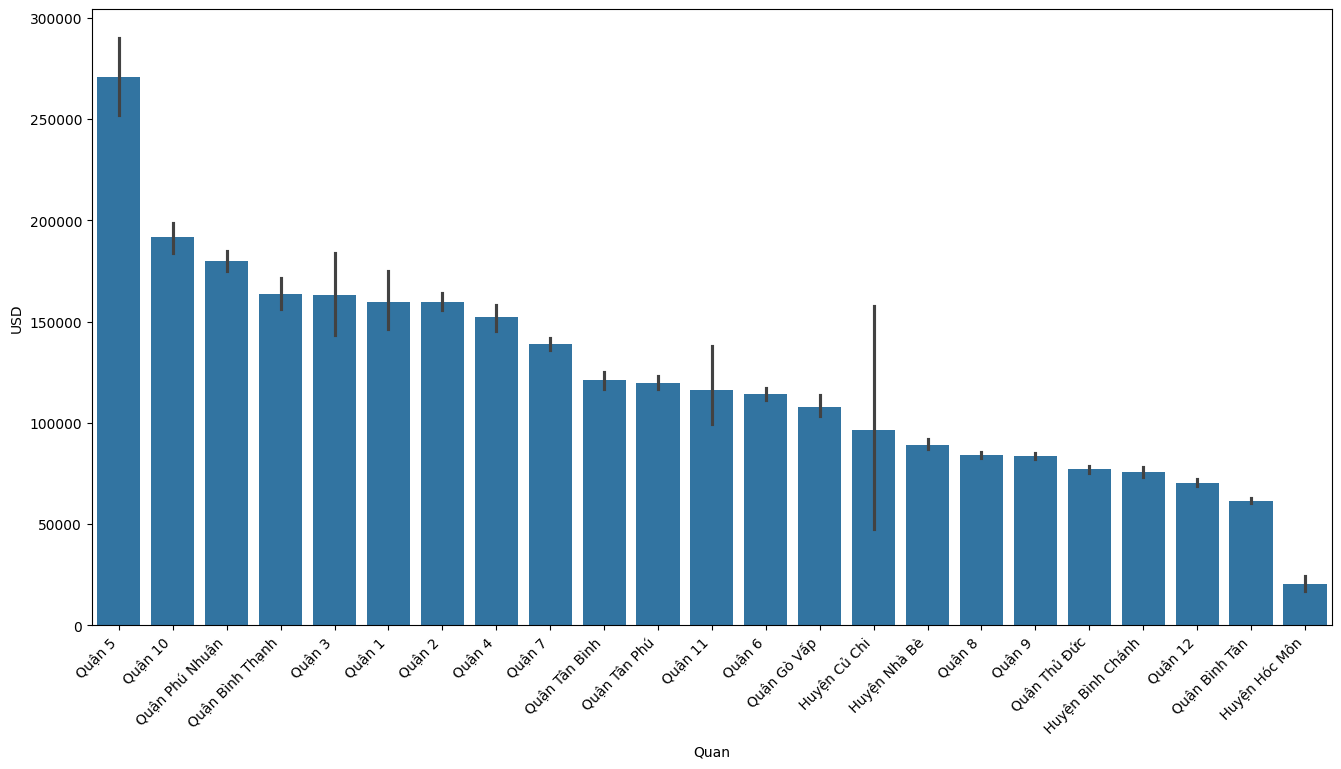

Index([' Quận 5', ' Quận 10', ' Quận Phú Nhuận', ' Quận Bình Thạnh', ' Quận 3',
       ' Quận 1', ' Quận 2', ' Quận 4', ' Quận 7', ' Quận Tân Bình',
       ' Quận Tân Phú', ' Quận 11', ' Quận 6', ' Quận Gò Vấp', ' Huyện Củ Chi',
       ' Huyện Nhà Bè', ' Quận 8', ' Quận 9', ' Quận Thủ Đức',
       ' Huyện Bình Chánh', ' Quận 12', ' Quận Bình Tân', ' Huyện Hóc Môn'],
      dtype='object', name='Quan')

In [30]:
# Trực quan hóa Quan và USD với biểu đồ histogram sắp xếp theo USD giảm dần
plt.figure(figsize=(16, 8))

sns.barplot(x='Quan', y='USD', data=df, order=df.groupby('Quan')['USD'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45, ha='right')

plt.show()

# in ra thứ tự các quận theo giá USD giảm dần
df.groupby('Quan')['USD'].mean().sort_values(ascending=False).index